# **Tabla Periódica**

![picture](https://i.etsystatic.com/24435148/r/il/aadd54/3169744124/il_fullxfull.3169744124_rl6m.jpg)

La tabla periódica agrupa elementos con propiedades físicas y químicas similares, mediante filas horizontales, llamadas períodos y columnas verticales llamadas grupos o familias. En este proyecto se utiliza una base de datos en formato JSON, este formato facilita el acceso a la información contenida en la tabla periódica y permite incluir una gran variedad de propiedades fisico-químicas, datos históricos, configuraciones electrónicas, etc.
En este proyecto se utiliza la tecnología MongoDB y la plataforma MongoDB Atlas.

## **Objetivos**

*   Utilizar la plataforma MongoDB Atlas para mantener y manejar los datos de la tabla periódica en formato JSON
*   Realizar búsquedas mediante la librería Pymongo
*   Calcular pesos moleculares de compuestos a partir de las masas atómicas contenidas en la base de datos
*   Agregar información valiosa a la base de datos, por ejemplo, las valencias de los elementos
*   Graficar la densidad de los elementos en función de su número atómico





Instalamos PyMongo:

In [ ]:
!python -m pip install 'pymongo[srv]'==4.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 488 kB 5.2 MB/s 
  Attempting uninstall: pymongo
    Found existing installation: pymongo 4.3.3
    Uninstalling pymongo-4.3.3:
      Successfully uninstalled pymongo-4.3.3


Importamos MongoClient para la conexión con MongoDB Atlas Database y json para  importar el dataset:

In [ ]:
from pymongo import MongoClient
import json

In [ ]:
connection_str = "mongodb+srv://@mlds3.2anzqal.mongodb.net/?retryWrites=true&w=majority"
client = MongoClient(connection_str)

Función para visualizar mejor las búsquedas

In [ ]:
def print_result(data):
    json_data = json.dumps(data, indent=4, sort_keys=True)
    print(json_data)

## **Dataset**

Se utilizará un dataset que contiene datos la tabla periódica de los elementos, tomada de Kaggle: https://www.kaggle.com/datasets/tchaye59/periodic-table-of-elements

Conexión con los Datos ya subidos a MongoDB Atlas:

In [ ]:
db = client["mlds3"]
collection = db["PeriodicTable"]

## **Estructura de los datos**

In [ ]:
res = collection.find_one({"name":"Gold"})
print_result(list(res))

[
    "_id",
    "name",
    "appearance",
    "atomic_mass",
    "boil",
    "category",
    "color",
    "density",
    "discovered_by",
    "melt",
    "molar_heat",
    "named_by",
    "number",
    "period",
    "phase",
    "source",
    "spectral_img",
    "summary",
    "symbol",
    "xpos",
    "ypos",
    "shells",
    "electron_configuration",
    "electron_configuration_semantic",
    "electron_affinity",
    "electronegativity_pauling",
    "ionization_energies",
    "cpk-hex"
]


| Variable | Definición	| Valores | 
| --- | --- | --- |
| id | 	Identificación  ||
| name | 	Nombre del elemento ||
| appearance | Apariencia del elemento  ||
| atomic_mass 	| Masa atómica  | u.m.a|
| boil 	|Temperatura de ebullición 	| °K |
| category | Clasificación 	|Metal, No metal, monoatómico, diatómico |
| color |	Color del elemento 	| |
| density |	Densidad 	|g/l para gases, g/cm³ para sólidos y líquidos |
| discovered_by |	Descubridor del elemento	| |
| molar_heat | Capacidad calorífica molar|J⋅K−1⋅mol−1 |
| named_by | Personaje que nombró el elemento| |
| number | Número atómico| |
| period | Periodo donde se encuentra el elemento| |
| phase | Fase | Gas, Liquid, Solid |
| source | Página web de referencia| |
| spectral_img | Imagen del espectro| |
| summary | Resumen de propiedades del elemento| |
| symbol | Símbolo químico del elemento||
| xpos |Grupo | 1 a 18|
| ypos |Período |1 a 7|
| shells 	| Número de electrones por nivel  de energía	| lista |
| electron_configuration 	|Configuración electrónica 	| Orbital separado por " " |
| electron_configuration_semantic 	|Configuración electrónica 	| Sin separador |
| electron_affinity | Afinidad electrónica 	|  |
| electronegativity_pauling 	|Electronegatividad 	| |
| ionization_energies 	|Energía de ionización 	| |
| cpk-hex 	| 	| Hexadecimal|

# **Queries**

Últimos 10 elementos de la tabla periódica:

In [ ]:
query0 = {}
proyection0 = {'number': True, 'symbol': True, "_id": False }
result0 = collection.find(query0,proyection0).sort("number", -1).limit(10)
print_result(list(result0))

[
    {
        "number": 119,
        "symbol": "Uue"
    },
    {
        "number": 118,
        "symbol": "Og"
    },
    {
        "number": 117,
        "symbol": "Ts"
    },
    {
        "number": 116,
        "symbol": "Lv"
    },
    {
        "number": 115,
        "symbol": "Mc"
    },
    {
        "number": 114,
        "symbol": "Fl"
    },
    {
        "number": 113,
        "symbol": "Nh"
    },
    {
        "number": 112,
        "symbol": "Cn"
    },
    {
        "number": 111,
        "symbol": "Rg"
    },
    {
        "number": 110,
        "symbol": "Ds"
    }
]


Elemento que se encuentra en el período 3 y en el grupo 2 (IIA)

In [ ]:
query1 = {"$and" : [{'xpos': 2}, {'ypos': 3}]}
proyection1 = {'name': True, 'number': True,"_id": False}
result1 = collection.find(query1, proyection1)
print_result(list(result1))

[
    {
        "name": "Magnesium",
        "number": 12
    }
]


Elementos líquidos de la tabla periodica:

In [ ]:
query1 = {'phase' : 'Liquid'}
proyection = {'name': True, 'number': True, "_id": False }
result1 = collection.find(query1, proyection)
print_result(list(result1))

[
    {
        "name": "Bromine",
        "number": 35
    },
    {
        "name": "Mercury",
        "number": 80
    }
]


Elemento con mayor electronegatividad:

In [ ]:
res = collection.aggregate([
   { "$group": {
      "_id": None,
      "MaximumValue": { "$max": "$electronegativity_pauling" },
      "MinimumValue": { "$min": "$electronegativity_pauling" },
   }}
])
print(list(res))

[{'_id': None, 'MaximumValue': 3.98, 'MinimumValue': 0.79}]


In [ ]:
query2 = {"electronegativity_pauling" : 3.98}
result2 = collection.find(query2, proyection)
print(list(result2))

[{'name': 'Fluorine', 'number': 9}]


Elementos (sólidos) más densos que el hierro y cuyo número atómico es menor que 92:

In [ ]:
query3 = {"$and" : [{"density":{"$gt": 7.9}}, {'phase' : 'Solid'}, {"number":{"$lt": 92}} ]}
proyection3 = {'density': True, 'name': True, 'number': True, "_id": False }
result3 = collection.find(query3, proyection3)
print_result(list(result3))

[
    {
        "density": 8.9,
        "name": "Cobalt",
        "number": 27
    },
    {
        "density": 8.908,
        "name": "Nickel",
        "number": 28
    },
    {
        "density": 8.96,
        "name": "Copper",
        "number": 29
    },
    {
        "density": 8.57,
        "name": "Niobium",
        "number": 41
    },
    {
        "density": 10.28,
        "name": "Molybdenum",
        "number": 42
    },
    {
        "density": 11,
        "name": "Technetium",
        "number": 43
    },
    {
        "density": 12.45,
        "name": "Ruthenium",
        "number": 44
    },
    {
        "density": 12.41,
        "name": "Rhodium",
        "number": 45
    },
    {
        "density": 12.023,
        "name": "Palladium",
        "number": 46
    },
    {
        "density": 10.49,
        "name": "Silver",
        "number": 47
    },
    {
        "density": 8.65,
        "name": "Cadmium",
        "number": 48
    },
    {
        "density": 8.23,
        "na

# **Cálculo del peso molecular**

In [ ]:
import re

def masa_atomica (symbol):
    query = {'symbol': f"{symbol}"} #realizamos la búsqueda por símbolo químico
    proyection = {'atomic_mass': True, "_id": False }
    mass = collection.find(query, proyection)
    atomica = list(mass)[0]['atomic_mass']
    return atomica

def peso_molecular (formula):
    res = re.split('(?=[A-Z])|(\d+)', formula) #Dividimos las fórmula en sus átomos y cantidades
    resOK = list(filter(None, res)) #Filtramos los valores None y ""
    peso = 0
    j = 0
    for i in resOK:  #Calculamos el peso molecular a partir de cada unidad de la fórmula
        if i.isalpha():  #Si el elemento de la lista contiene caracteres se referirán al símbolo químico
            peso += masa_atomica(i)
        else:
            peso += (int(i)-1)*masa_atomica(resOK[j-1]) #Si el elemento de la lista contiene dígitos, este número se multiplica por la masa atómica del elemento anterior
        j += 1
    return round(peso, 3)

print(peso_molecular('H2SO4'))

98.072


## **Valencias**

Un dato importante de la tabla periódica son las valencias de los elementos, en este caso la base de datos no contiene esta información, agreguemos algunos valores:

In [ ]:
query = {'number': 1}
data = {'$set' : {'valences' : [1] }}
collection.update_one(query,data)

query = {'number': 8}
data = {'$set' : {'valences' : [-2, -1] }}
collection.update_one(query,data)

query = {'number': 11}
data = {'$set' : {'valences' : [1] }}
collection.update_one(query,data)

query = {'number': 16}
data = {'$set' : {'valences' : [-2, 2, 4, 6] }}
collection.update_one(query,data)

query = {'number': 17}
data = {'$set' : {'valences' : [-1, 1, 3,5,7] }}
collection.update_one(query,data)

Verificamos los datos que se agregaron:

In [ ]:
query4 = {"valences" : {'$exists': True} }
proyection4 = {"name": True, "symbol": True, "valences": True, "_id": False }
result4 = collection.find(query4, proyection4)
print_result(list(result4))

[
    {
        "name": "Hydrogen",
        "symbol": "H",
        "valences": [
            1
        ]
    },
    {
        "name": "Oxygen",
        "symbol": "O",
        "valences": [
            -2,
            -1
        ]
    },
    {
        "name": "Sodium",
        "symbol": "Na",
        "valences": [
            1
        ]
    },
    {
        "name": "Sulfur",
        "symbol": "S",
        "valences": [
            -2,
            2,
            4,
            6
        ]
    },
    {
        "name": "Chlorine",
        "symbol": "Cl",
        "valences": [
            -1,
            1,
            3,
            5,
            7
        ]
    }
]


Grafiquemos la densidad de los elementos sólidos (hasta Z = 100) contra su número atómico:

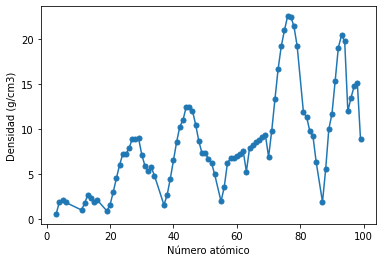

In [ ]:
import matplotlib.pyplot as plt

query5 = {"$and" : [{'phase' : 'Solid'}, {"number":{"$lte": 100}}]}
proyection5 = {'density': True, 'number': True, "_id": False } 
result5 = collection.find(query5, proyection5)
densidades = list(result5)
x = []
y = []
for i in densidades:
  x.append(i['number'])
  y.append(i['density'])
plt.xlabel("Número atómico")
plt.ylabel("Densidad (g/cm3)")
plt.rcParams["figure.figsize"] = (10,15)
plt.plot(x, y, marker = '.', markersize = 10)

En cada período hay un aumento inicial de la densidad y después disminuye nuevamente, los elementos más densos se encuentran en la mitad de la tabla periódica (grupos 5-11)